<a href="https://colab.research.google.com/github/madalamanikanta/Iris-Flower-Classification/blob/main/EML_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Flower Classification**


Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

Load the Iris Dataset

In [ ]:
iris = load_iris()
print("Dataset loaded. It is a 'Bunch' object, similar to a dictionary.")
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

Dataset loaded. It is a 'Bunch' object, similar to a dictionary.
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


Create and Explore the DataFrame

In [ ]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("DataFrame created from features. First 5 rows:")
print(df.head())

DataFrame created from features. First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
df['species'] = iris.target
print("Added 'species' column. First 5 rows with target:")
print(df.head())

Added 'species' column. First 5 rows with target:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
print(f"DataFrame shape: {df.shape} (rows, columns)")

DataFrame shape: (150, 5) (rows, columns)


In [ ]:
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [ ]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [ ]:
print("Class distribution:")
print(df['species'].value_counts())
# Or using Counter, like in our lab work
print("Class distribution using Counter:", Counter(df['species']))

Class distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64
Class distribution using Counter: Counter({0: 50, 1: 50, 2: 50})


Exploratory Data Analysis (EDA)

Generating count plot for species distribution...


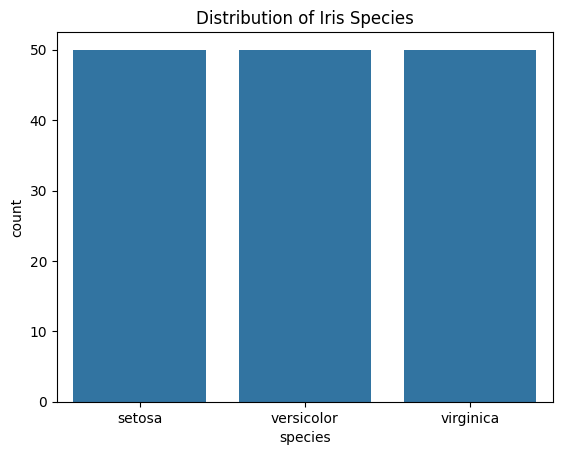

In [ ]:
print("Generating count plot for species distribution...")
sns.countplot(x='species', data=df)
plt.title("Distribution of Iris Species")
plt.xticks(ticks=[0, 1, 2], labels=iris.target_names)
plt.show()

Generating pair plot...


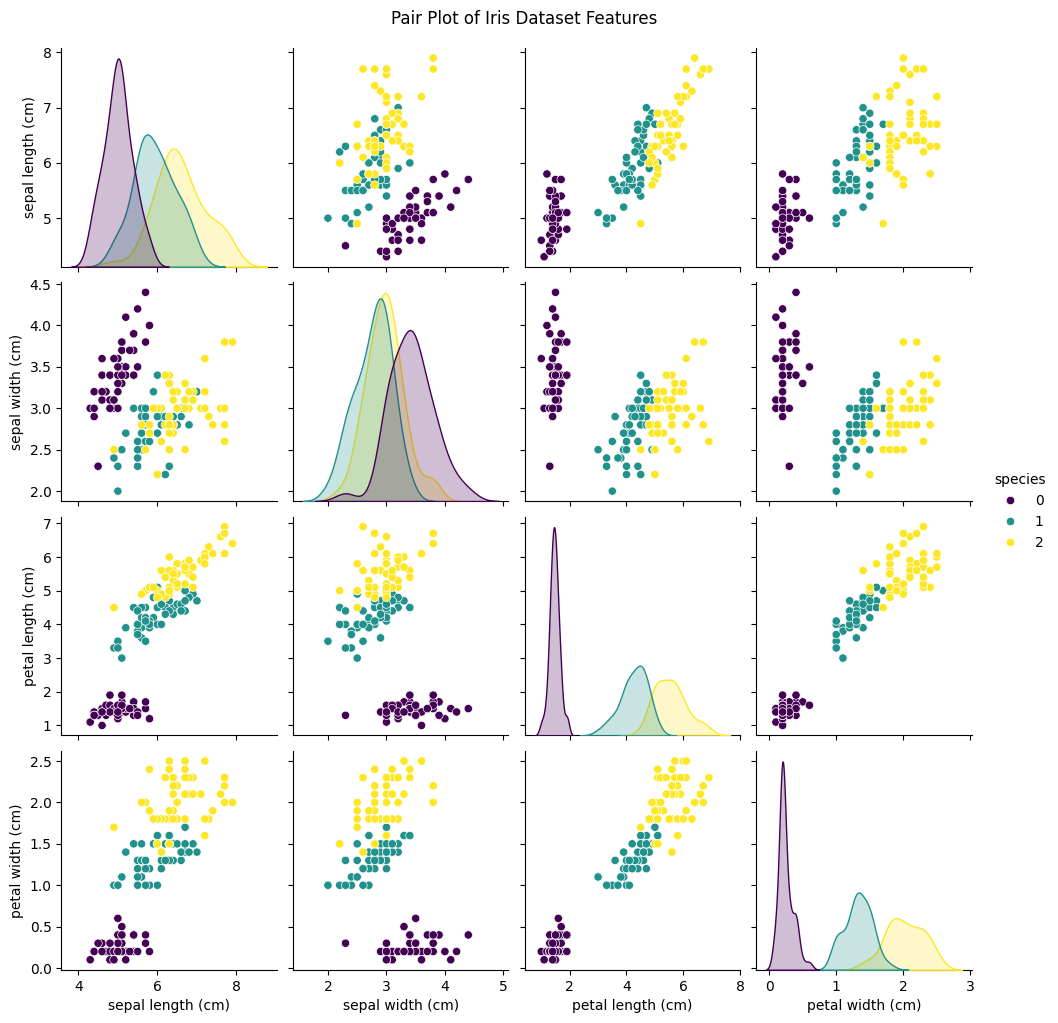

In [ ]:
print("Generating pair plot...")
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle("Pair Plot of Iris Dataset Features", y=1.02)
plt.show()

Generating correlation heatmap...


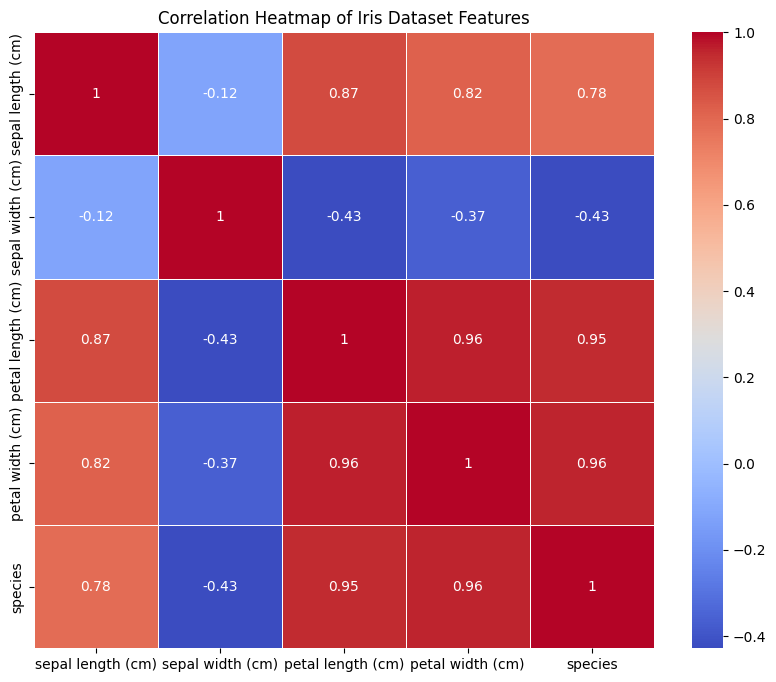

In [ ]:
print("Generating correlation heatmap...")
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Iris Dataset Features")
plt.show()

Prepare Data for Modeling

In [ ]:
X = df.drop('species', axis=1)
y = df['species']
print("Features (X) and target (y) have been separated.")
print("X shape:", X.shape)
print("y shape:", y.shape)

Features (X) and target (y) have been separated.
X shape: (150, 4)
y shape: (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)


Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features have been scaled using StandardScaler.")
print("First 5 rows of scaled X_train:")
print(X_train[:5])

Features have been scaled using StandardScaler.
First 5 rows of scaled X_train:
[[-0.4134164  -1.46200287 -0.09951105 -0.32339776]
 [ 0.55122187 -0.50256349  0.71770262  0.35303182]
 [ 0.67180165  0.21701605  0.95119225  0.75888956]
 [ 0.91296121 -0.02284379  0.30909579  0.2177459 ]
 [ 1.63643991  1.41631528  1.30142668  1.70589097]]


Find the Optimal Number of Neighbors (k)

Plotting accuracy for different values of k...


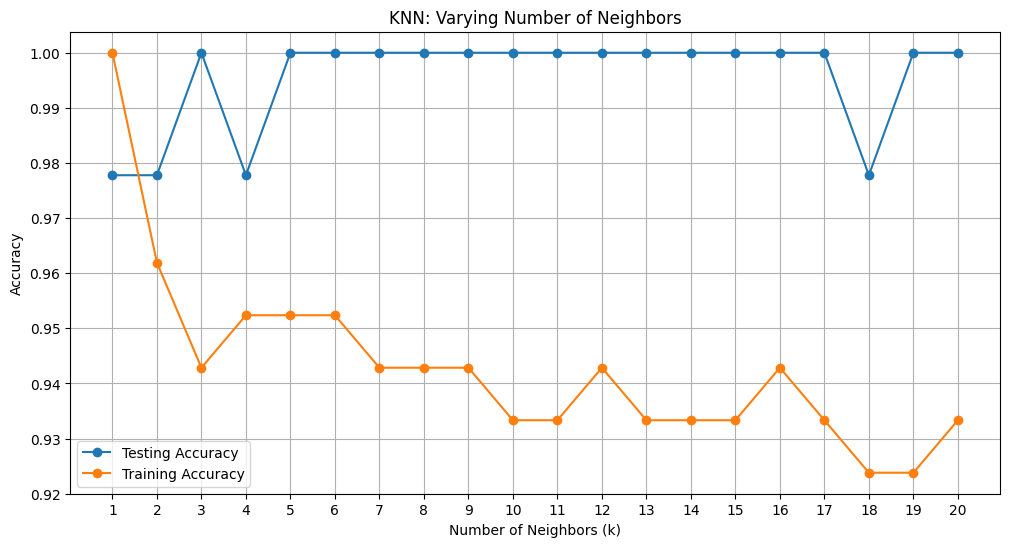

In [ ]:
neighbors = np.arange(1, 21)
train_accuracy = []
test_accuracy = []

for k in neighbors:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    train_accuracy.append(knn_temp.score(X_train, y_train))
    test_accuracy.append(knn_temp.score(X_test, y_test))

print("Plotting accuracy for different values of k...")
plt.figure(figsize=(12, 6))
plt.title('KNN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy', marker='o')
plt.plot(neighbors, train_accuracy, label='Training Accuracy', marker='o')
plt.legend()
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid(True)
plt.show()

In [ ]:
optimal_k = 5
print(f"An optimal k value appears to be {optimal_k}. We will use this for our final model.\n")

An optimal k value appears to be 5. We will use this for our final model.



Train and Evaluate the Final KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
print("Final model trained successfully.")

Final model trained successfully.


In [ ]:
y_pred = knn.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
accuracy = knn.score(X_test, y_test)
print(f"Model Accuracy Score: {accuracy * 100:.2f}%")


Model Accuracy Score: 100.00%


In [ ]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [ ]:
print("Confusion Matrix (crosstab):")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


Confusion Matrix (crosstab):
Predicted   0   1   2  All
True                      
0          19   0   0   19
1           0  13   0   13
2           0   0  13   13
All        19  13  13   45



Visualizing Confusion Matrix...


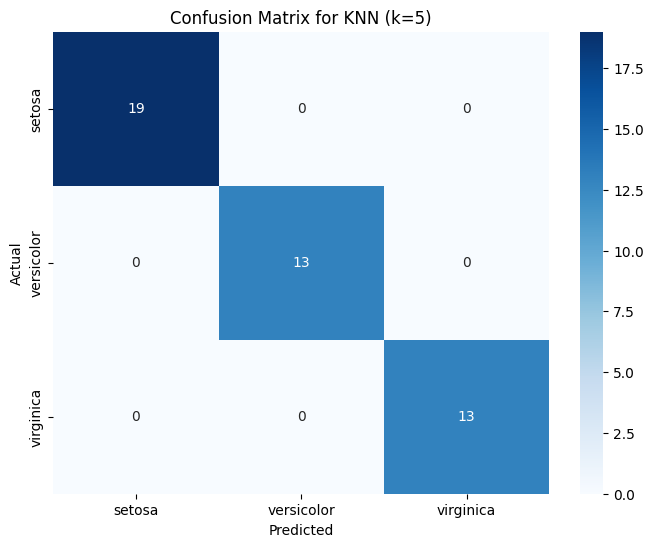

In [ ]:
print("Visualizing Confusion Matrix...")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for KNN (k={optimal_k})')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

